In [4]:
import pandas as pd
import random 
import string 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

In [5]:
# Функция для создания user_id 
def create_id() -> str:
    symbols = string.digits + 'abcdefghigk'
    length = 15 
    id_combination = ''.join(random.choices(symbols, k=length))
    return id_combination

# Функция для создания total_cost
def create_total_cost() -> np.ndarray:
    lambda_param = 1  
    shift = +1   
    samples = np.round(np.random.exponential(scale=1/lambda_param, size=10000) + shift, 2)
    return samples

# Фунция для создания retention 
def create_retention() -> list:
    values = [1, 2, 3, 4, 5]
    probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
    samples = np.random.choice(values, size=10000, p=probabilities)
    return samples
    

In [6]:
np.random.seed(228)
random.seed(0)

df = pd.DataFrame({
    'user_id': [create_id() for _ in range(10000)],
    'order_number': [random.randint(1, 10) for _ in range(10000)],
    'delivery_time': np.round([random.normalvariate(1440, 200) for _ in range(10000)], 2),
    'total_cost': create_total_cost(),
    'retention': create_retention()
})

df.head()

,user_id,order_number,delivery_time,total_cost,retention
0,hf85a8g6acga5fc,5,1468.13,1.55,2
1,5gkhi6fie929cgk,1,1714.04,1.78,5
2,ai5gb0f8he0ai56,7,1274.10,2.17,1
3,i4b5kg916ag2beb,7,1459.74,1.42,1
4,hbkcc9c8c633cda,9,1617.65,1.58,2


In [7]:
# Указываем среднее время доставки для каждой группы заказов
df.groupby('order_number').agg(
    mean_delivery_time = ('delivery_time', 'mean')
).reset_index()

,order_number,mean_delivery_time
0,1,1443.067321
1,2,1436.941701
2,3,1447.768946
3,4,1434.804500
4,5,1442.662365
5,6,1441.404767
6,7,1443.004338
7,8,1434.579157
8,9,1445.069736
9,10,1438.939421


In [8]:
# Проверяем наличие дублей в id 
len(df['user_id'].unique()) == len(df)

df['mean_delivery_time'] = df.groupby('order_number')['delivery_time'].transform('mean')
df.head()

df['segment'] = pd.qcut(df['order_number'], q=4, labels=['1-3', '4-6', '6-9', '10'])
df

,user_id,order_number,delivery_time,total_cost,retention,mean_delivery_time,segment
0,hf85a8g6acga5fc,5,1468.13,1.55,2,1442.662365,4-6
1,5gkhi6fie929cgk,1,1714.04,1.78,5,1443.067321,1-3
2,ai5gb0f8he0ai56,7,1274.10,2.17,1,1443.004338,6-9
3,i4b5kg916ag2beb,7,1459.74,1.42,1,1443.004338,6-9
4,hbkcc9c8c633cda,9,1617.65,1.58,2,1445.069736,10
...,...,...,...,...,...,...,...
9995,fa8ffbb9b0d29g7,6,1716.50,1.42,3,1441.404767,4-6
9996,gggc6dh8h868gd9,4,1571.20,1.65,1,1434.804500,4-6
9997,5gg66db99ch6361,8,1134.46,1.86,2,1434.579157,6-9
9998,akh9he4cgd01i5k,9,1001.84,1.71,3,1445.069736,10


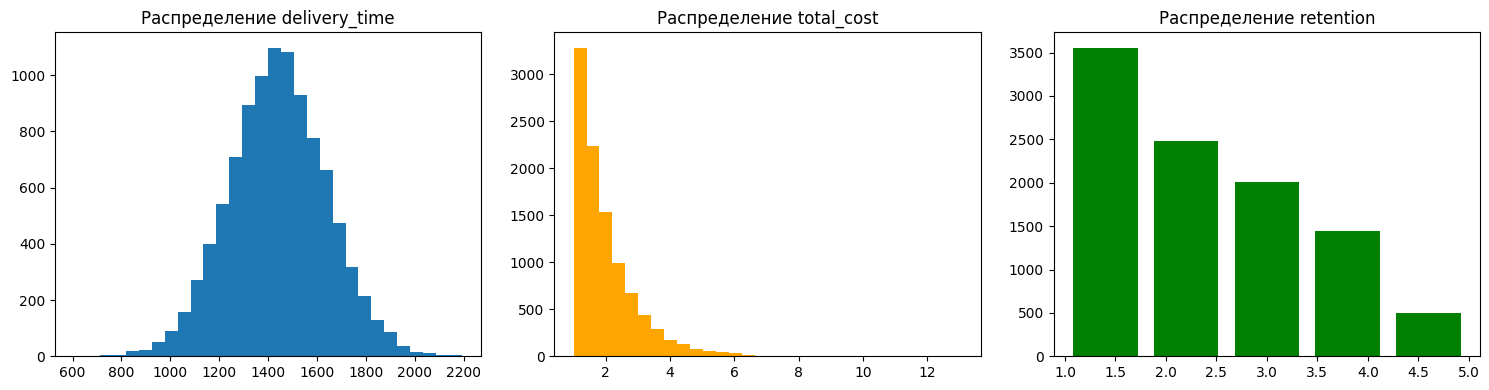

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['delivery_time'], bins=30)
axes[0].set_title("Распределение delivery_time")

axes[1].hist(df['total_cost'], bins=30, color='orange')
axes[1].set_title("Распределение total_cost")

axes[2].hist(df['retention'], bins=5, color='green', rwidth=0.8)
axes[2].set_title("Распределение retention")

plt.tight_layout()
plt.show()

In [10]:
total_cost_mode = stats.mode(df['total_cost'])
total_cost_mean = np.mean(df['total_cost'])
total_cost_median = np.median(df['total_cost'])
total_cost_variance = np.var(df['total_cost'])
total_cost_std = np.std(df['total_cost'])

print('Статистика по столбцу total_cost:')
print('=================================')
print(f'Среднее: {total_cost_mean}')
print(f'Мода: {total_cost_mode}')
print(f'Медиана: {total_cost_median}')
print(f'Дисперсия: {total_cost_variance}')
print(f'Стандартное отклонение: {total_cost_std}')

Статистика по столбцу total_cost:
Среднее: 1.9919229999999997
Мода: ModeResult(mode=np.float64(1.01), count=np.int64(113))
Медиана: 1.69
Дисперсия: 0.9702723920709999
Стандартное отклонение: 0.9850240565950661


In [11]:
categories = sorted(df['order_number'].unique())
values = df.groupby('order_number')['delivery_time'].mean()
categories

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

In [15]:
fig = go.Figure(data=[
    go.Bar(
        x=categories, 
        y=values,
        text=values,
        textposition='outside',  # значения вне столбцов
        texttemplate='%{text:.2f}',  # формат чисел
        marker_color='blue',
    )
])

# Точная настройка масштаба
y_range_min = min(values) - (max(values) - min(values)) * 0.15
y_range_max = max(values) + (max(values) - min(values)) * 0.15

fig.update_layout(
    height=600,
    yaxis=dict(
        range=[y_range_min, y_range_max],
        tickformat=',.2f' 
    ),
    title={
        'text': 'Время доставки по номерам заказа',
        'x': 0.5,  # центрирование
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    margin=dict(t=50, b=50, l=50, r=50) 
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
categories = df['segment'].unique()
categories =  sorted(categories, key=lambda x: int(x.split('-')[0]))
values = df.groupby('order_number')['delivery_time'].mean()

df.groupby('order_number')['delivery_time'].get_group(10)

11      1278.75
13      1421.27
24      1489.48
28      1217.65
32      1518.71
         ...   
9908    1731.22
9959    1263.63
9960    1443.80
9974    1700.67
9978    1324.16
Name: delivery_time, Length: 968, dtype: float64

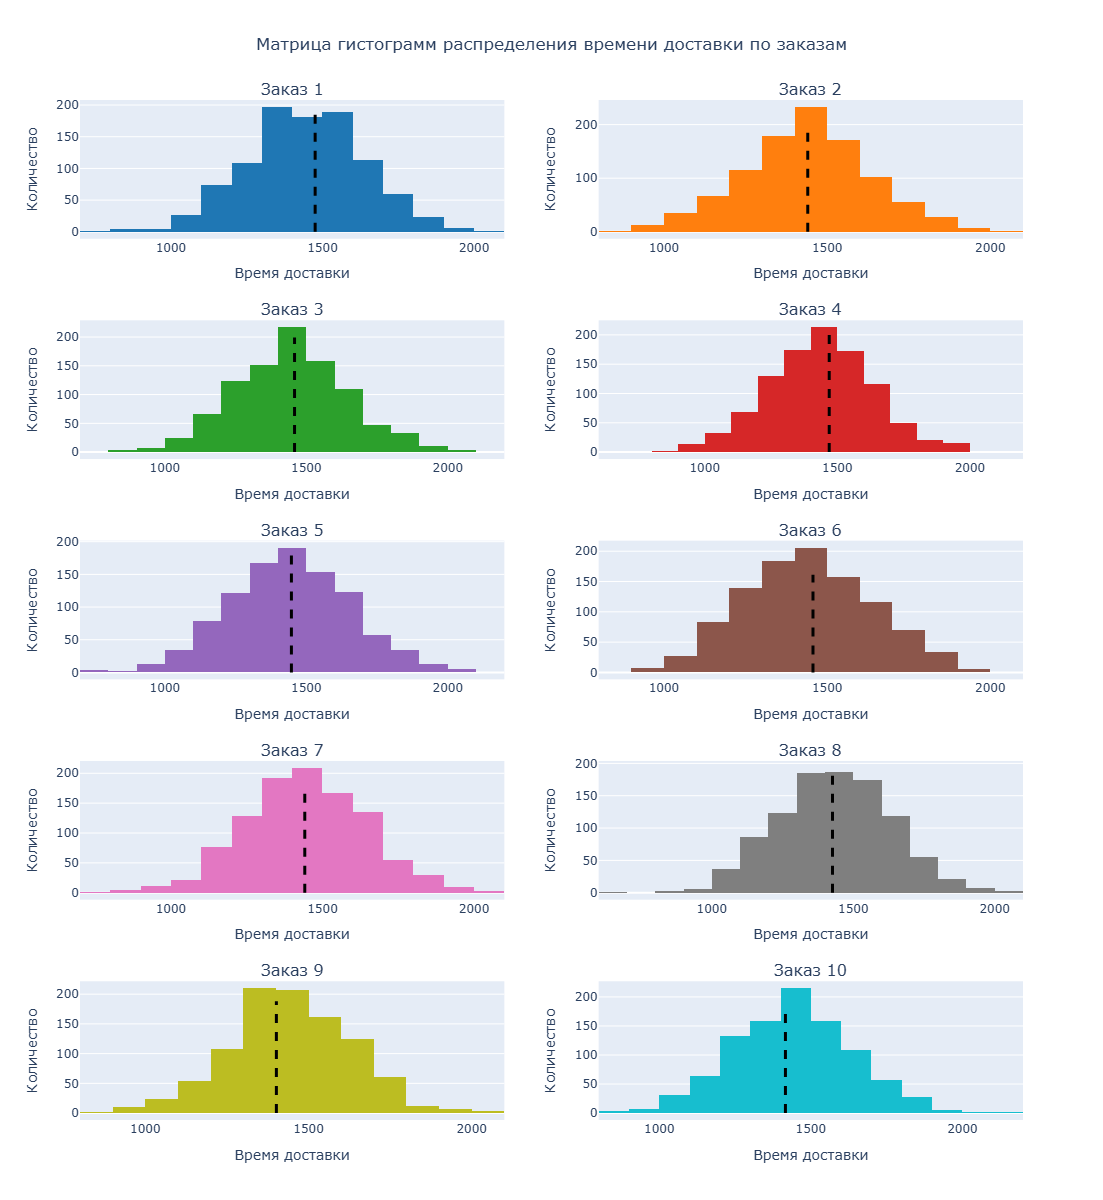

In [ ]:
# Предположим, что у нас есть DataFrame df с колонками 'order_number' и 'delivery_time'
# и есть 10 групп (order_number от 1 до 10)

# Создаем список цветов для каждого графика
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Создаем subplots с матрицей 5x2
fig = make_subplots(rows=5, cols=2, 
                   subplot_titles=[f'Заказ {i}' for i in range(1, 11)],
                   vertical_spacing=0.08)

for i in range(1, 11):
    try:
        # Получаем данные для группы
        group_data = df.groupby('order_number')['delivery_time'].get_group(i)
        
        # Создаем гистограмму для текущей группы
        hist_fig = px.histogram(x=group_data, nbins=30, color_discrete_sequence=[colors[i-1]])
        
        # Добавляем гистограмму в subplot
        for trace in hist_fig.data:
            fig.add_trace(trace, row=(i-1)//2 + 1, col=(i-1)%2 + 1)
        
        # Находим bin с максимальной частотой
        counts, bins = np.histogram(group_data, bins=15)
        max_count_idx = np.argmax(counts)
        max_bin_center = (bins[max_count_idx] + bins[max_count_idx + 1]) / 2
        
        # Добавляем вертикальную линию для максимума
        fig.add_trace(go.Scatter(
            x=[max_bin_center, max_bin_center],
            y=[0, counts[max_count_idx]],
            mode='lines',
            line=dict(color='black', width=3, dash='dash'),
            name=f'Максимум {i}',
            showlegend=False
        ), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
        
    except KeyError:
        # Если группы нет, пропускаем
        continue

# Обновляем layout
fig.update_layout(
    title_text='Матрица гистограмм распределения времени доставки по заказам',
    title_x=0.5,
    height=1200,
    showlegend=False
)

# Обновляем оси
for i in range(1, 11):
    fig.update_xaxes(title_text='Время доставки', row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig.update_yaxes(title_text='Количество', row=(i-1)//2 + 1, col=(i-1)%2 + 1)

fig.show()

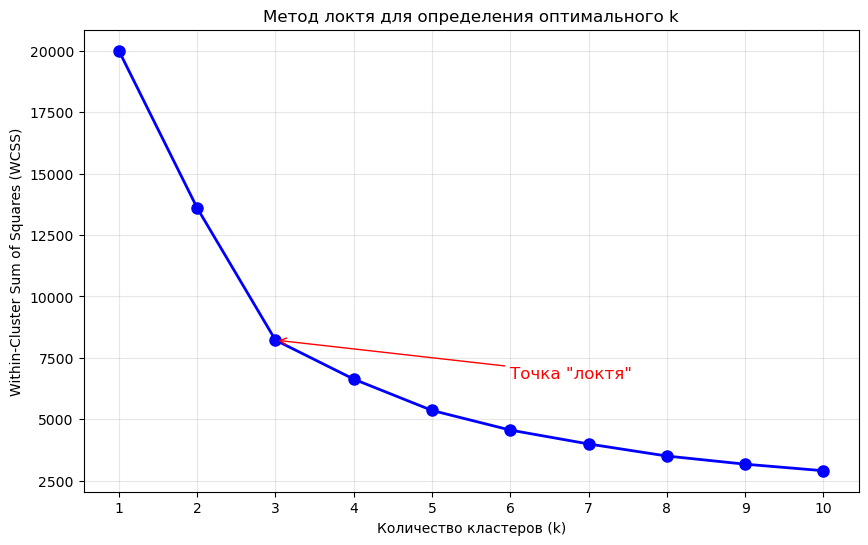

In [ ]:
data_x = np.array([(x, y) for x, y in zip(df['delivery_time'], df['total_cost'])])

# Стандартизация данных (важно для K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_x)

# Метод локтя
def elbow_method(X, max_k=10):
    """
    Функция для построения графика метода локтя
    
    Parameters:
    X - данные для кластеризации
    max_k - максимальное количество кластеров для проверки
    """
    inertia = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    return k_range, inertia

# Строим график метода локтя
k_range, inertia = elbow_method(X_scaled, max_k=10)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Добавляем аннотацию для локтя
plt.annotate('Точка "локтя"', 
             xy=(3, inertia[2]), 
             xytext=(6, inertia[3] + 50),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

plt.show()

In [ ]:
np.random.seed(228)

M = np.mean(data_x, axis=0)      
D = np.var(data_x, axis=0)       
K = 3                      
ma = [data_x[i] for i in np.random.choice(len(data_x), K, replace=False)]
N = 100  

# def p(ma, x_i):
#     return np.mean(np.abs(np.array(ma)-np.array(x_i)))

def centroid_recalc(cluster, index):
    if len(cluster) > 0:
        total_x = []
        total_y = []
        for x, y in cluster:
            total_x.append(x)
            total_y.append(y)
        return (np.mean(total_x), np.mean(total_y))
    else:
        return ma[index]
        
def p(ma, x_i):
    return np.sqrt((ma[0]-x_i[0])**2+(ma[1]-x_i[1])**2)

history = []

for i in range(N):
    clusters = [
        [], 
        [], 
        []
    ]
    cluster_labels = []
    
    for x in data_x:
        x_distances = {0: p(ma[0], x), 1: p(ma[1], x), 2: p(ma[2], x)}
        min_distance = x_distances[0]
        k = 0
        for k_index, x_distance in x_distances.items():
            if x_distance < min_distance:
                min_distance = x_distance
                k = k_index
        clusters[k].append(x) 
        cluster_labels.append(k)

    history.append({
        'centroids': ma.copy(),
        'labels': cluster_labels.copy()
    })
    
    ma = [centroid_recalc(clusters[0], 0), centroid_recalc(clusters[1], 1), centroid_recalc(clusters[2], 2)]
X = clusters 

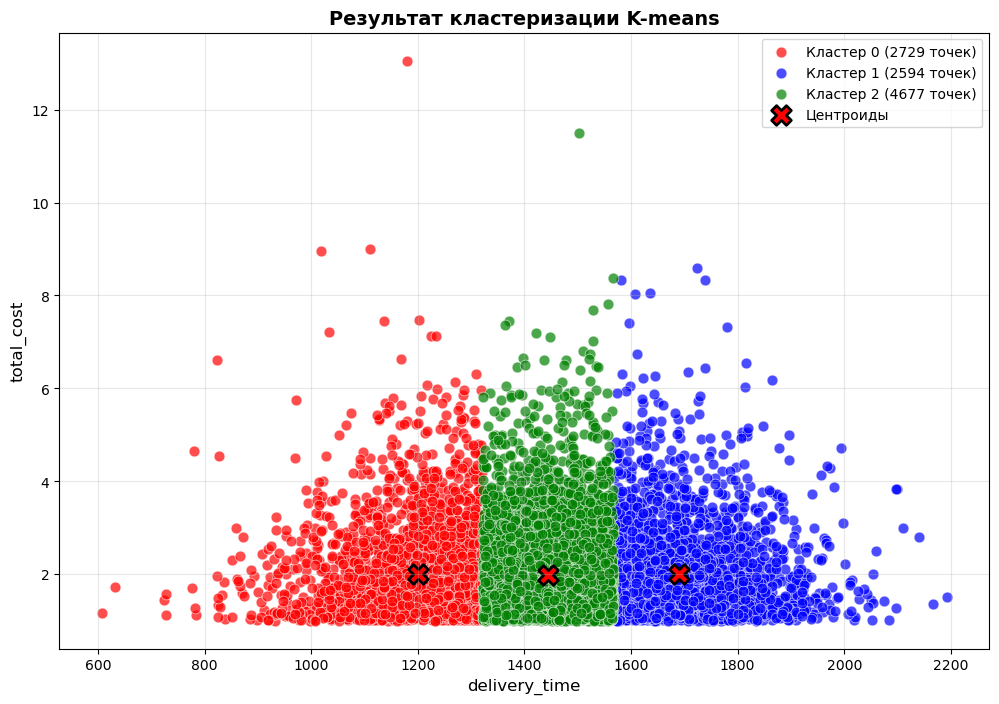

In [ ]:
# Простая визуализация финального результата
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green']

# Отображаем точки данных с цветами по кластерам
for i, cluster in enumerate(clusters):
    if len(cluster) > 0:
        cluster_array = np.array(cluster)
        plt.scatter(cluster_array[:, 0], cluster_array[:, 1], 
                   color=colors[i], s=60, alpha=0.7, 
                   label=f'Кластер {i} ({len(cluster)} точек)',
                   edgecolors='white', linewidth=0.5)

# Отображаем центроиды
centroids_array = np.array(ma)
plt.scatter(centroids_array[:, 0], centroids_array[:, 1], 
           color='red', s=200, marker='X', 
           label='Центроиды', edgecolors='black', linewidth=2)

plt.xlabel('delivery_time', fontsize=12)
plt.ylabel('total_cost', fontsize=12)
plt.title('Результат кластеризации K-means', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import itertools

# ---------- функция вычисления energy statistic ----------
def energy_stat(X, Y):
    a = np.mean(cdist(X, X))
    b = np.mean(cdist(Y, Y))
    c = np.mean(cdist(X, Y))
    return 2 * c - a - b

# ---------- перестановочный тест ----------
def perm_test_energy(X, Y, n_perm=100, random_state=None):
    rng = np.random.default_rng(random_state)
    XY = np.vstack([X, Y])
    n, m = len(X), len(Y)
    obs = energy_stat(X, Y)
    perm_stats = np.empty(n_perm)
    
    for i in range(n_perm):
        idx = rng.permutation(n + m)
        Xp = XY[idx[:n]]
        Yp = XY[idx[n:]]
        perm_stats[i] = energy_stat(Xp, Yp)
    
    p_value = (np.sum(perm_stats >= obs) + 1) / (n_perm + 1)
    return obs, p_value, perm_stats

# ---------- применение к твоим кластерам ----------
# X — список из трёх кластеров
X = [np.array(cluster) for cluster in X]

results = {}
pairs = list(itertools.combinations(range(len(X)), 2))

for i, j in pairs:
    obs, pval, _ = perm_test_energy(X[i], X[j], n_perm=100, random_state=42)
    results[(i, j)] = (obs, pval)
    print(f"Кластеры {i} и {j}: energy={obs:.4f}, p-value={pval:.4f}")

# интерпретация
print("\nИнтерпретация:")
for (i, j), (obs, p) in results.items():
    if p < 0.05:
        print(f"✅ Кластеры {i} и {j} статистически различаются (p={p:.4f})")
    else:
        print(f"❌ Кластеры {i} и {j} НЕ различаются статистически значимо (p={p:.4f})")


Кластеры 0 и 1: energy=762.5804, p-value=0.0099
Кластеры 0 и 2: energy=301.1512, p-value=0.0099
Кластеры 1 и 2: energy=303.4170, p-value=0.0099

Интерпретация:
✅ Кластеры 0 и 1 статистически различаются (p=0.0099)
✅ Кластеры 0 и 2 статистически различаются (p=0.0099)
✅ Кластеры 1 и 2 статистически различаются (p=0.0099)
